# Exploratory Data Analysis (EDA) on MLB dataset


In [1]:
#importing different libraries for loading the data and 
#for using different package
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as st
import scipy.stats
from scipy import stats
from matplotlib.figure import Figure

In [2]:
from bokeh.io import output_notebook
output_notebook()

from bokeh.plotting import figure
from bokeh.io import show

Loading BokehJS ...

In [3]:
#loading the data in the variable using pandas library and displaying first five rows
mlb_data=pd.read_csv('D://ASTON UNI BA MODULES//SOFTWARE ANALYTICS//Report/mlb.csv')
mlb_data.head()

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
0,3375000,shortstop,black,38407380,8,918,3333,407,863,156,...,73,342,259,137,582,133,968,70.27797,18.84423,10.8778
1,3100000,firstbase,white,38407380,5,751,2807,370,840,148,...,46,355,299,341,228,41,994,70.27797,18.84423,10.8778
2,2900000,thirdbase,white,38407380,8,1056,3337,405,816,143,...,107,421,245,306,653,15,971,70.27797,18.84423,10.8778
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,...,124,541,258,316,725,32,977,70.27797,18.84423,10.8778
4,700000,outfield,black,38407380,17,2032,7489,1136,2145,270,...,40,574,286,416,1098,660,987,70.27797,18.84423,10.8778


In [4]:
#number of rows and columns of mlb_dataset
mlb_data.shape
#the dataset has 352 rows and 21 columns 

(352, 21)

In [5]:
#getting column labels, column data types, and the number of cells in each column are all 
#information about the dataframe.We can see that there are 3 varibales with have missing values
#and those are white percent in city,black percent in city and hispanic percent in city
mlb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   salary                    352 non-null    int64  
 1   player_position           352 non-null    object 
 2   race                      352 non-null    object 
 3   team_payroll              352 non-null    int64  
 4   years_played              352 non-null    int64  
 5   games_played              352 non-null    int64  
 6   career_at_bats            352 non-null    int64  
 7   career_runs               352 non-null    int64  
 8   career_hits               352 non-null    int64  
 9   career_doubles            352 non-null    int64  
 10  career_triples            352 non-null    int64  
 11  career_homeruns           352 non-null    int64  
 12  career_runs_batted_in     352 non-null    int64  
 13  career_batting_average    352 non-null    int64  
 14  career_wal

In [6]:
#descriptive statistics of the for different variables
#this gives us the count,mean,standard deviation ,minimum and maximum
#values different quartile ranges
mlb_data.describe()

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
count,3.520000e+02,3.520000e+02,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,329.000000,329.000000,329.000000
mean,1.331514e+06,3.077320e+07,6.309659,645.423295,2155.704545,288.170455,580.889205,103.267045,16.590909,54.531250,263.122159,258.900568,210.926136,338.681818,65.096591,976.474432,72.638240,16.541950,10.819810
std,1.383952e+06,8.725344e+06,3.873810,536.499990,2013.393716,298.500277,571.632472,103.831374,21.395948,73.369759,281.741692,38.443636,227.191851,323.886980,112.548093,19.751430,15.249897,13.688558,9.402261
min,1.090000e+05,8.854000e+06,1.000000,7.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,111.000000,0.000000,0.000000,0.000000,800.000000,20.296300,3.741786,0.540870
25%,2.527000e+05,2.455733e+07,3.000000,230.000000,631.500000,73.000000,163.000000,26.000000,3.000000,8.000000,59.750000,245.000000,49.750000,101.000000,4.750000,969.000000,67.668960,8.007545,1.962080
50%,6.750000e+05,3.413650e+07,6.000000,518.500000,1583.000000,190.500000,416.000000,70.000000,9.000000,26.000000,172.000000,259.000000,137.000000,235.500000,24.500000,980.500000,74.619650,14.453980,10.877800
75%,2.250000e+06,3.779200e+07,9.000000,930.000000,3026.000000,405.500000,817.250000,146.250000,23.000000,70.000000,358.000000,275.000000,304.250000,474.000000,75.000000,988.000000,82.948860,18.755630,16.330650
max,6.200000e+06,4.286600e+07,20.000000,2729.000000,10554.000000,1570.000000,3025.000000,634.000000,142.000000,432.000000,1710.000000,625.000000,1286.000000,1891.000000,1042.000000,1000.000000,94.696270,73.960030,31.037500


We can infer from the statistical table that the mean salary is 1331514. the maximum salary is 6200000. The mean of team payroll is 30773200.There is a pllayer who has palyed for 20 years. The most runs scored in the career is 1570 and the minimum is 1. the maximum career homeruns is 432 with the mean career homeruns is 54.53.

In [7]:
#checking for null values in the dataset and
#creating a new variable in order to retain the original dataset
new_mlb_data = mlb_data
mlb_data.isnull().sum()

salary                       0
player_position              0
race                         0
team_payroll                 0
years_played                 0
games_played                 0
career_at_bats               0
career_runs                  0
career_hits                  0
career_doubles               0
career_triples               0
career_homeruns              0
career_runs_batted_in        0
career_batting_average       0
career_walks                 0
career_strike_outs           0
career_stolen_bases          0
career_fielding_percent      0
white_percent_in_city       23
black_percent_in_city       23
hispanic_percent_in_city    23
dtype: int64

we see that there are 3 categories with null values of 23, so we need to fill thoses missing values with mean of those variables

In [8]:
#there are 3 variables with missing values and
#we need to fill the with the mean of the particular variable.
#we will be using the mean of white percent in city,black percent in city and hispanic percent in city
new_mlb_data['white_percent_in_city'] = new_mlb_data['white_percent_in_city'].fillna(new_mlb_data.white_percent_in_city.mean())
new_mlb_data['black_percent_in_city'] = new_mlb_data['black_percent_in_city'].fillna(new_mlb_data.black_percent_in_city.mean())
new_mlb_data['hispanic_percent_in_city'] = new_mlb_data['hispanic_percent_in_city'].fillna(new_mlb_data.hispanic_percent_in_city.mean())

In [9]:
#after imputing the data with mean values for the three variables, checking for null values again
new_mlb_data.isnull().sum()
#we can see that there are no more missing values in the datset.

salary                      0
player_position             0
race                        0
team_payroll                0
years_played                0
games_played                0
career_at_bats              0
career_runs                 0
career_hits                 0
career_doubles              0
career_triples              0
career_homeruns             0
career_runs_batted_in       0
career_batting_average      0
career_walks                0
career_strike_outs          0
career_stolen_bases         0
career_fielding_percent     0
white_percent_in_city       0
black_percent_in_city       0
hispanic_percent_in_city    0
dtype: int64

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'games_played'}>],
       [<AxesSubplot:title={'center':'career_batting_average'}>,
        <AxesSubplot:>]], dtype=object)

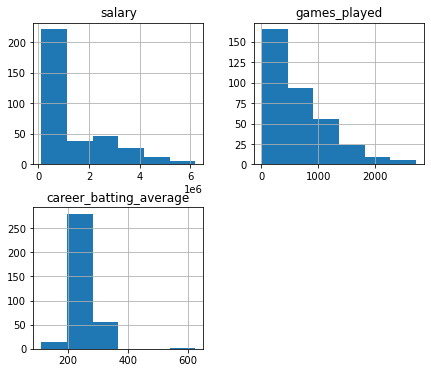

In [10]:
#visualizing the distribution of different variables through histogram
#The visualization has been plotted for salary,games played and career batting average with a bin of 6.
new_mlb_data.hist(column=['salary','games_played','career_batting_average'],bins=6, figsize=(7,6))

The data for salary,games played and career batting average is right skewed which means that the mean>median>mode.
200 players have salary less than 1000000 and more than 150 players have played 500 games.
More than 250 players have career batting average between 200 and 300

array([[<AxesSubplot:title={'center':'career_homeruns'}>,
        <AxesSubplot:title={'center':'career_fielding_percent'}>],
       [<AxesSubplot:title={'center':'career_runs'}>, <AxesSubplot:>]],
      dtype=object)

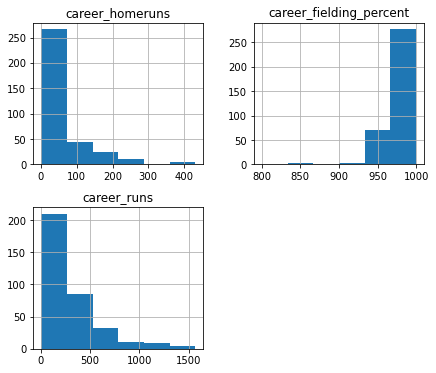

In [11]:
#visualizing the distribution of different variables through histogram
#we can also see the distribution of data for career homeruns,career fielding percent and career run
new_mlb_data.hist(column=['career_homeruns','career_fielding_percent','career_runs'],bins=6, figsize=(7,6))

The data for career homeruns,career runs is right skewed but career filding percent is left skewed which means that the mean<median<mode.
More than 200 players have scored less than 250 runs in their career and more than 250 players have fielding percent of 975 in their career.
More than 250 players have scoed homeruns.

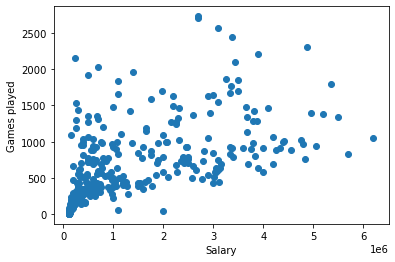

In [12]:
#Visualization of a pair of continuous variables through scatter plot
plt.scatter(new_mlb_data.salary, new_mlb_data.games_played)
plt.xlabel("Salary")
plt.ylabel("Games played")
plt.show()

The scatter plot shows a linear relationship between salary and games played by players.
As per the plot there is a high concentration of players who have salary less than 1500000 and have played about 1000 games.We see that there is a player who has played just more than 1000 games and has the maximum salary.Also the is player who has played more than 2500 games but has a salary less than 3000000.

In [13]:
#correlation is used to determine the strength between the varibales 
#here we found correlation between salary and games played
scipy.stats.pearsonr(new_mlb_data.salary, new_mlb_data.games_played)[0]

0.5845462029888311

salary and games played is moderately related.thus to some extent the variabes influence each other.

<AxesSubplot:>

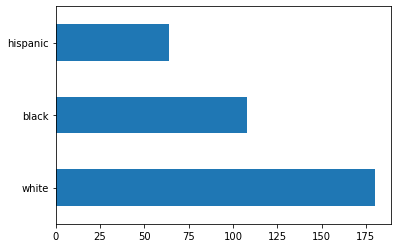

In [14]:
#unique values of categorical variable is visualized using bargraph
#Here we have visualized the distribtion of race
new_mlb_data['race'].value_counts().plot.barh()

There are 3 different races black,white and hispnic.More than 175 of the players are white as per the plot and the palyers with hispanic race are the lowest.

<AxesSubplot:>

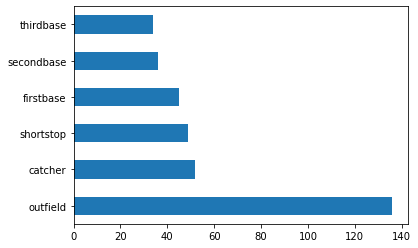

In [15]:
#visualizing the distribution of player position which is a
#categorical variable using bargraph
new_mlb_data['player_position'].value_counts().plot.barh()

more than 120 player play  in the outfield position

In [16]:
#building a contingency table,
#which will show how often different values of the two categorical variables co-occur.
cont_table = pd.crosstab(new_mlb_data['player_position'], new_mlb_data['race'])
# displaying the contingency table
cont_table

race,black,hispanic,white
player_position,,,
catcher,2,7,43
firstbase,10,9,26
outfield,72,19,45
secondbase,8,7,21
shortstop,7,19,23
thirdbase,9,3,22


Chi-square test was used to conduct statistical test of the independence between as they are categorical variables.

null hypothesis : race not dependent on the player position.

alternate hypothesis : race is dependent on the player position.

<AxesSubplot:xlabel='player_position'>

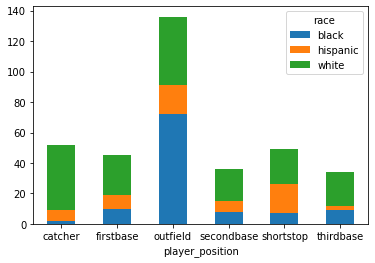

In [17]:
#plotting the contingency table in a stacked bar graph
cont_table.plot(kind="bar", stacked=True, rot=0)

The plot suggests that there is great share of people of different races in the outfield position.from the plot we can also infer that whites are the most in all the playing postions except that is outfield. 

In [18]:
#performing the chi-square test
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)
print(f"p-value: {p_val}")

p-value: 2.2934333235364454e-12


Here the p-value is less that 0.05, hence we reject the null hypothesis. Thus race and player posistions are not independent. race determines the postion of the player .

In [19]:
#retriving a subset of player who have salaries less than 1500000 and their is white
subset_data1 = new_mlb_data[(new_mlb_data.salary < 2500000) & (new_mlb_data.race == 'black')]
subset_data1.head()

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,...,124,541,258,316,725,32,977,70.27797,18.84423,10.87780
4,700000,outfield,black,38407380,17,2032,7489,1136,2145,270,...,40,574,286,416,1098,660,987,70.27797,18.84423,10.87780
8,212500,outfield,black,38407380,3,156,434,45,116,16,...,10,59,267,18,48,6,971,70.27797,18.84423,10.87780
16,200000,outfield,black,18297546,5,478,1348,155,351,69,...,26,123,260,112,218,59,972,59.59597,14.45398,25.95005
21,123000,outfield,black,18297546,1,32,99,14,29,6,...,0,7,293,11,13,0,967,59.59597,14.45398,25.95005


In [20]:
#number of rows and columns for the first subset data
subset_data1.shape

(76, 21)

In [21]:
#descriptive statistics for the first subset of data
subset_data1.describe()

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
count,7.600000e+01,7.600000e+01,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,7.039167e+05,2.896844e+07,5.671053,535.289474,1736.250000,228.802632,469.447368,75.750000,15.842105,36.657895,200.828947,263.526316,159.026316,283.434211,75.421053,974.500000,73.840240,16.422040,9.737718
std,5.976690e+05,9.845467e+06,3.638271,466.280626,1696.208597,230.076510,473.641620,78.407164,21.525212,47.860506,213.746104,42.603747,154.655141,273.649963,118.086665,24.866845,14.550871,13.031243,9.164698
min,1.090000e+05,8.854000e+06,1.000000,10.000000,7.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,167.000000,0.000000,0.000000,0.000000,800.000000,20.296300,3.741786,0.540870
25%,2.500000e+05,2.298767e+07,3.000000,215.250000,579.250000,77.000000,148.000000,22.750000,3.750000,6.000000,55.500000,249.000000,47.500000,92.250000,11.750000,968.750000,67.668960,8.007545,1.952275
50%,4.875000e+05,2.897050e+07,5.000000,380.500000,1239.500000,159.500000,331.000000,52.000000,8.000000,17.000000,124.500000,260.500000,108.500000,209.500000,33.000000,978.500000,76.999080,16.034660,5.743671
75%,1.000000e+06,3.736794e+07,8.000000,739.250000,2369.250000,280.000000,598.250000,98.750000,20.250000,49.000000,255.750000,273.250000,230.750000,362.750000,85.500000,986.250000,83.115810,18.755630,14.802680
max,2.312500e+06,4.286600e+07,17.000000,2032.000000,7489.000000,1136.000000,2145.000000,334.000000,142.000000,241.000000,1066.000000,571.000000,707.000000,1098.000000,660.000000,1000.000000,94.696270,73.960030,31.037500


In [22]:
#retriving a subset of player who have played for less than 12 and their position is outfield
subset_data2 = new_mlb_data[(new_mlb_data.years_played < 12) & (new_mlb_data.player_position == 'outfield')]
subset_data2.head()

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
5,695000,outfield,hispanic,38407380,4,394,1293,179,303,51,...,37,141,234,77,358,67,965,70.27797,18.84423,10.87780
8,212500,outfield,black,38407380,3,156,434,45,116,16,...,10,59,267,18,48,6,971,70.27797,18.84423,10.87780
13,1250000,outfield,hispanic,18297546,4,442,1617,230,419,69,...,35,209,259,122,383,46,973,59.59597,14.45398,25.95005
16,200000,outfield,black,18297546,5,478,1348,155,351,69,...,26,123,260,112,218,59,972,59.59597,14.45398,25.95005
19,136000,outfield,white,18297546,2,86,197,19,44,8,...,4,27,223,24,62,0,1000,59.59597,14.45398,25.95005


In [23]:
#number of rows and columns for the second subset data
subset_data2.shape

(121, 21)

In [24]:
#descriptive statistics for the second subset of data
subset_data2.describe()

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
count,1.210000e+02,1.210000e+02,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,1.474089e+06,3.026413e+07,5.537190,564.975207,1885.074380,266.884298,506.966942,88.801653,17.148760,53.330579,237.247934,257.264463,173.223140,338.371901,76.471074,976.446281,72.840624,16.185551,10.973825
std,1.528361e+06,9.193439e+06,2.955338,405.232515,1501.210407,223.682297,425.496728,76.658183,17.992897,62.292775,221.133794,30.539802,153.743265,299.807303,91.719870,22.065792,14.180331,12.332961,9.222375
min,1.090000e+05,8.854000e+06,1.000000,12.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,111.000000,0.000000,0.000000,0.000000,850.000000,20.296300,3.741786,0.540870
25%,2.750000e+05,2.455733e+07,3.000000,230.000000,650.000000,86.000000,175.000000,28.000000,4.000000,8.000000,60.000000,247.000000,60.000000,107.000000,13.000000,973.000000,67.668960,9.049699,2.887507
50%,7.250000e+05,3.158083e+07,5.000000,478.000000,1566.000000,227.000000,409.000000,69.000000,12.000000,31.000000,168.000000,260.000000,127.000000,266.000000,46.000000,982.000000,73.642940,14.453980,10.819810
75%,2.466667e+06,3.779200e+07,8.000000,869.000000,2980.000000,398.000000,756.000000,131.000000,25.000000,72.000000,333.000000,275.000000,251.000000,492.000000,107.000000,986.000000,82.948860,17.528360,16.330650
max,6.200000e+06,4.286600e+07,11.000000,1485.000000,5713.000000,842.000000,1864.000000,304.000000,85.000000,285.000000,938.000000,327.000000,674.000000,1440.000000,610.000000,1000.000000,94.696270,73.960030,31.037500


In [25]:
#retrieveing data of salary where race is black and white
blacks_data = new_mlb_data[new_mlb_data['race'] == 'black']['salary']
whites_data = new_mlb_data[new_mlb_data['race'] == 'white']['salary']

Independent two sample test was used to conduct statistical test.

null hypothesis : there is a no significant difference(either lower or higher) between means  of salary of blacks and whites

alternate hypothesis :there is a significant difference(either lower or higher) between means  of salary of blacks and whites

In [26]:
#independet two sample test
t_val, p_val = stats.ttest_ind(blacks_data, whites_data)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 2.439220849805341, p-value: 0.015326987986046892


Here the p-value is less than 0.05  hence we reject the null hypothesis. Thus, there is a significant difference(either lower or higher) between means of salary of blacks and whites.

In [27]:
#creating a table by grouping the data using race
race_data = new_mlb_data.groupby(['race'])
race_data.head()

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
0,3375000,shortstop,black,38407380,8,918,3333,407,863,156,...,73,342,259,137,582,133,968,70.27797,18.84423,10.87780
1,3100000,firstbase,white,38407380,5,751,2807,370,840,148,...,46,355,299,341,228,41,994,70.27797,18.84423,10.87780
2,2900000,thirdbase,white,38407380,8,1056,3337,405,816,143,...,107,421,245,306,653,15,971,70.27797,18.84423,10.87780
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,...,124,541,258,316,725,32,977,70.27797,18.84423,10.87780
4,700000,outfield,black,38407380,17,2032,7489,1136,2145,270,...,40,574,286,416,1098,660,987,70.27797,18.84423,10.87780
5,695000,outfield,hispanic,38407380,4,394,1293,179,303,51,...,37,141,234,77,358,67,965,70.27797,18.84423,10.87780
6,275000,catcher,white,38407380,10,432,1005,78,240,35,...,13,95,239,39,140,1,990,70.27797,18.84423,10.87780
7,235000,shortstop,hispanic,38407380,4,223,491,37,118,16,...,1,29,240,23,62,6,963,70.27797,18.84423,10.87780
8,212500,outfield,black,38407380,3,156,434,45,116,16,...,10,59,267,18,48,6,971,70.27797,18.84423,10.87780
9,212500,catcher,white,38407380,2,169,447,41,111,18,...,14,44,248,47,109,3,993,70.27797,18.84423,10.87780


In [28]:
#size based on race
race_data.size()

race
black       108
hispanic     64
white       180
dtype: int64

In [29]:
#summarized information for each group based on race
race_data.describe()

salary                                                            \
          count          mean           std       min       25%       50%   
race                                                                        
black     108.0  1.654350e+06  1.629973e+06  109000.0  343750.0  968333.5   
hispanic   64.0  1.050723e+06  1.201798e+06  109000.0  193500.0  500000.0   
white     180.0  1.237650e+06  1.248731e+06  109000.0  248750.0  662500.0   

                               team_payroll                ...  \
                75%        max        count          mean  ...   
race                                                       ...   
black     3031250.0  6200000.0        108.0  3.083429e+07  ...   
hispanic  1618750.0  4800000.0         64.0  2.938260e+07  ...   
white     2112500.0  5359973.0        180.0  3.123098e+07  ...   

         black_percent_in_city           hispanic_percent_in_city             \
                           75%       max                    count       mean   
race                                                                           
black                18.755630  73.96003                    108.0   9.559678   
hispanic             17.835178  73.96003                     64.0  11.010285   
white                17.528360  73.96003                    180.0  11.508165   

                                                                      
               std      min       25%        50%        75%      max  
race                                                                  
black     8.805248  0.54087  1.922861   5.743671  14.802680  31.0375  
hispanic  9.195357  0.54087  1.922861  10.877800  16.635302  31.0375  
white     9.188896  0.54087  3.532760  10.877800  16.330650  31.0375  

[3 rows x 152 columns]

In [30]:
#encoding the categorical values to use them in the model into 1's and 0's 
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()
new_mlb_data['player_position'] = LB.fit_transform(new_mlb_data['player_position'].astype('object'))
new_mlb_data['race'] = LB.fit_transform(new_mlb_data['race'].astype('object'))
new_mlb_data.head()

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
0,3375000,4,0,38407380,8,918,3333,407,863,156,...,73,342,259,137,582,133,968,70.27797,18.84423,10.8778
1,3100000,1,2,38407380,5,751,2807,370,840,148,...,46,355,299,341,228,41,994,70.27797,18.84423,10.8778
2,2900000,5,2,38407380,8,1056,3337,405,816,143,...,107,421,245,306,653,15,971,70.27797,18.84423,10.8778
3,1650000,2,0,38407380,12,1196,3603,437,928,19,...,124,541,258,316,725,32,977,70.27797,18.84423,10.8778
4,700000,2,0,38407380,17,2032,7489,1136,2145,270,...,40,574,286,416,1098,660,987,70.27797,18.84423,10.8778


# Linear regression model 

In [31]:
#performing linear regression by creating a model by including player position, 
#years played, career runs,games played,career homeruns,career homeruns, career hits,
#  career doubles,career walks,career strike outs,career at bats
mlb_model = st.OLS.from_formula("salary ~ player_position + years_played + games_played + career_runs + career_homeruns + career_at_bats + career_hits + career_doubles + career_walks + career_strike_outs", data = new_mlb_data).fit()
mlb_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     30.85
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           3.81e-42
Time:                        01:54:25   Log-Likelihood:                -5363.0
No. Observations:                 352   AIC:                         1.075e+04
Df Residuals:                     341   BIC:                         1.079e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           8.512e+05   1.48e+05      5.736      0.000    5.59e+05    1.14e+06
player_position    -2.416e+04   3.82e+04     -0.633      0.527   -9.92e+04    5.09e+04
years_played       -1.535e+05   5.35e+04     -2.867      0.004   -2.59e+05   -4.82e+04
games_played        1724.8146   1176.424      1.466      0.144    -589.147    4038.776
career_runs         3088.7718    717.332      4.306      0.000    1677.820    4499.724
career_homeruns     6140.0125   1582.292      3.880      0.000    3027.731    9252.294
career_at_bats      -446.3054    448.401     -0.995      0.320   -1328.285     435.675
career_hits          337.4131   1208.473      0.279      0.780   -2039.586    2714.412
career_doubles      1927.9756   2056.490      0.938      0.349   -2117.027    5972.979
career_walks       -1027.4615    656.450     -1.565      0.118   -2318.663     263.740
career_strike_outs  -150.8940    389.422     -0.387      0.699    -916.866     615.078
==============================================================================
Omnibus:                       33.627   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.360
Skew:                           0.675   Prob(JB):                     8.57e-11
Kurtosis:                       4.156   Cond. No.                     9.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As the R-square and adjusted R-square are 0.4 which suggests that the model is not a perfect model but there are variables where the p-value is greater than 0.05. Thus they are insignificant to the model hence we remove those variable to create the parsimonious model.

In [32]:
#we  create another model where in we are removing the variables 
#which do not cotribute to the model i.e. p>0.05
mlb_model2= st.OLS.from_formula("salary ~  years_played  + career_runs + career_homeruns ", data = new_mlb_data).fit()
mlb_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     101.7
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           2.77e-47
Time:                        01:54:25   Log-Likelihood:                -5365.6
No. Observations:                 352   AIC:                         1.074e+04
Df Residuals:                     348   BIC:                         1.075e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        7.663e+05   1.11e+05      6.889      0.000    5.48e+05    9.85e+05
years_played    -9.464e+04   2.59e+04     -3.655      0.000   -1.46e+05   -4.37e+04
career_runs      2964.6432    380.292      7.796      0.000    2216.683    3712.604
career_homeruns  5648.5454   1133.890      4.982      0.000    3418.406    7878.685
==============================================================================
Omnibus:                       34.989   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.229
Skew:                           0.698   Prob(JB):                     3.37e-11
Kurtosis:                       4.157   Cond. No.                         881.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After removing several variables where p-value was greater than 0.05 we finally come up with parsimonious model.We have removed 7 variables when compared to the first model.
calculation of relationship between salary which is our dependent variable and all other variables that we have considered in our model is independent variable is given by multipication of coefficients from the summary table with the variables and also adding the intercept.
Hence our model can be described as

salary = 766300 - 94640 * years_played + 2964.6432 * career_runs + 5648.5454 * career_homeruns + e

Thus the salary can be predicted using the above equation. looking at the signs of the coefficients that all of the variables accept the years played variable effect the salary positively. Here all the variables are significant.

The R-square and adjusted R square is 0.4 which is far from a perfect model.


# Checking for assumptions

In [33]:
#The relation between standardised residuals and fitted values for the dependent 
#variable is depicted in the graph below.
fig = figure(height=400, width=400)

# the x axis is the fitted values
# the y axis is the standardized residuals
st_resids = mlb_model2.get_influence().resid_studentized_internal
fig.circle(mlb_model2.fittedvalues, st_resids)

show(fig)

The standardised residuals and its histogram can be plotted to ensure that the model's assumptions of normality of the residual distribution is not valid and zero mean residuals is also not satisfied. there is pattern formed in the scatter plot.

In [34]:
#plotting histogram with 10 bins
hist, edges = np.histogram(st_resids, bins=10)
fig = figure(height=400, width=400)
fig.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
show(fig)

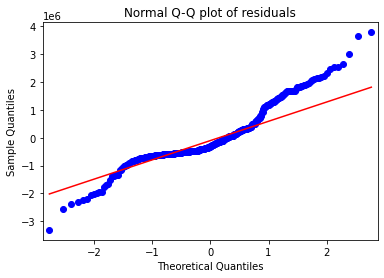

In [35]:
#q-q plot to check for normality
qqplot=st.qqplot(mlb_model2.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

By q-q plot we confirm that the residuals are not normally distributed.
From the Jarque-Bera test on the residuals (the third table of the summary) indicates that the errors are not normally distributed and the p-value(3.37e-11) is less than 0.05 thus we reject the null hypothesis of normal distribution.
As a result, removing the insignifiant variables did not increase the model's quality, and the assumptions zero mean residual and normality of the linear regression method did not hold true in this case.
Thus, the model is not adequate.

In [1]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [4]:
import io
from nbformat import read, NO_CONVERT

with io.open(NOTEBOOK_FULL_PATH.split("/")[-1], 'r', encoding='utf-8') as f:
    nb = read(f, NO_CONVERT)

word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(f"Word count: {word_count}")

Word count: 809
